# Introduction TO Quantitative Finance Group Project

### Discussion of Results

In [12]:
df

,PriceSimulations,Price,GreekSimulations,vega,delta
0,5000,4.996104,2000,81.736028,0.696998


#### Price

In [14]:
print("Price of Asian option: $", price)

Price of Asian option: $ 4.996103875456643


Pricing such a complex and exotic option is not an easy task, in fact it is so difficult that even a Nobel Prize winning formula by Black, Merton and Scholes (1973) is not able to price it.<br>
<br>
Therefore to price this option we simulated 5000 possible paths of the underlying asset and also 5000 possible paths for volatility then, because we know the options payoff structure, we were able to calculate the options payoff after each simulation. After discounting the 5000 payoffs with a generous 5% discount rate we were able to estimate the options price at **4.996104$**.<br>
<br>
Meaning, that if we were to sell this option to a buyer, we would receive a premium of **4.996104$** for it.

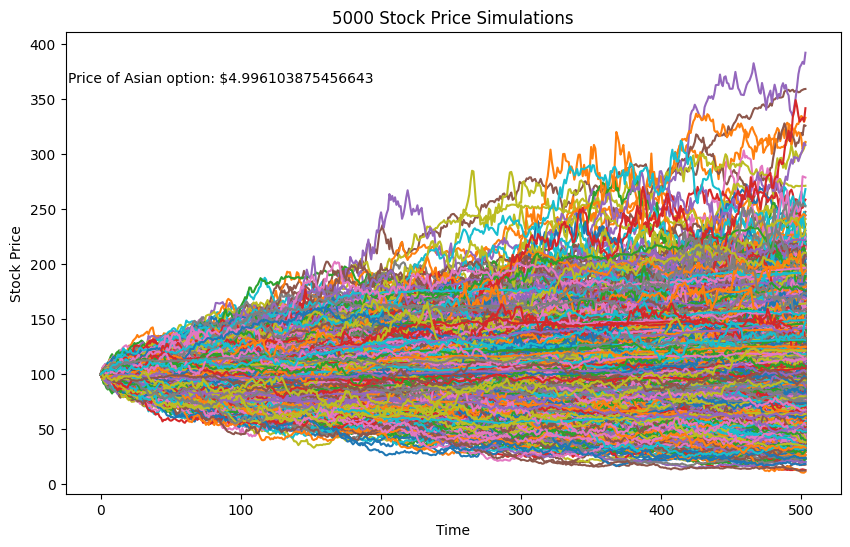

In [13]:
time = np.arange(int(paramsAsian[7]**-1*paramsAsian[8]))

# Stock Price
plt.figure(figsize=(10,6))
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{numPrice_simulationsAsian} Stock Price Simulations" )
plt.text(0.2, 0.9, f"Price of Asian option: ${price}",ha='center', va='center',  transform=plt.gca().transAxes)

plt.plot(time, S_matrix);

#### Delta and Vega

In [15]:
print("The Delta of the Asian option is: ", delta)
print("The Vega of the Asian option is: ", vega)

The Delta of the Asian option is:  0.6969976616915319
The Vega of the Asian option is:  81.73602759680416


The delta and vega of an option are its sensitivity to the underlying asset and volatility respectively. <br>
<br>
After simulating 2000 paths for the underlying asset and 2000 paths for volatility, we were able to calculate the options delta and vega at **0.696998** and **81.736028** respectively.<br>
<br>
This means that if the underlying asset price increases by 1%, the options price will increase by **0.696998%** and if the volatility increases by 1%, the options price will increase by **0.81736028%**.<br>
<br>
Having a delta of **0.696998** means that the option is **69.6998%** in the money, meaning that if we were to exercise the option, we would receive a payoff of **69.6998%** of the underlying asset price.<br>
<br>
Having a positive delta means that the option is "bullish (Call)", meaning that if the underlying asset price increases, the options price will increase as well.<br>
<br>
Having a positive vegas means that the option is a volatility seeker, meaning that if the volatility increases, the options price will increase as well.<br>

## Monte Carlo Simulation and Indepth Look

Monte Carlo simulations are a great way to estimate the price of an option, because they are able to simulate the possible paths of the underlying asset, volatility, and even risk free rate (Vasicek Model) then calculate the options payoff after each simulation and price the option accordingly. <br>

##### Estimating Pi using Monte Carlo Simulation

To better demonstrate our understanding of the Monte Carlo simulations, we will show a very interesting way how one can estimate $\pi$ using Monte Carlo simulations.<br>
<br>
The idea is to simulate a large number of points in a square and then count the number of points that fall inside a circle, then divide the number of points inside the circle by the total number of points and multiply by 4. <br>
<br>
This is a very interesting way to estimate $\pi$ because the area of a circle is $\pi r^2$ and the area of a square is $4r^2$ and the ratio between the area of a circle and a square is $\frac{\pi}{4}$, therefore if we divide the number of points inside the circle by the total number of points and multiply by 4, we will get an estimate for $\pi$.<br>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches

In [20]:
x = np.random.rand(1000,2) # (10000,2) a matris that consist of random float numbers

center = np.array([[0.5,0.5]]) # center of circle
r = 0.5 # radius of circle

c = ((((x - center)**2).sum(axis=1))**0.5 <= r) # number of the points inside the circle that radius <=0.5

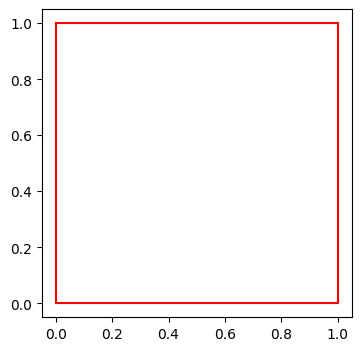

In [21]:
# creating a 1 by 1 square
N = 100
edge0 = np.zeros(N)
edge1 = np.ones(N)
y0 = np.linspace(0,1,N)
y1 = np.linspace(0,1,N)

edge3 = np.zeros(N)
edge4 = np.ones(N)
x0 = np.linspace(0,1,N)
x1 = np.linspace(0,1,N)

plt.figure(figsize=(4,4))
plt.plot(edge0, y0, color='red')
plt.plot(edge1, y1, color='red')
plt.plot(x0, edge3, color='red')
plt.plot(x1, edge4, color='red')

(-0.1, 1.1)

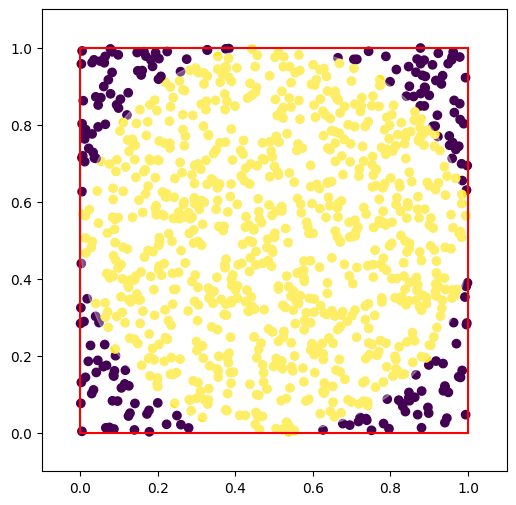

In [23]:
# ploting the random points with yellow ones being in a circle
plt.figure(figsize=(6,6))
plt.scatter(*x.T,c=c)

circle1 = plt.Circle((0.5, 0.5), 0.5, color='white', alpha=0.3) # circle with center at a (0.5,0.5)
plt.gca().add_patch(circle1)

plt.plot(edge0, y0, color='red')
plt.plot(edge1, y1, color='red')
plt.plot(x0, edge3, color='red')
plt.plot(x1, edge4, color='red')

plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

Provided that the points formed are large enough, the probability that these points are within the square, centered (0.5, 0.5) and inside the circle with a radius of 0.5 must converge to the ratio of the area of the circle to the area of the square.

$$\frac{Points\ Generated\ in\ Circle}{Points\ Generated\ in\ Square} = \frac{\pi r^2}{(2r)^2} = \frac{\pi}{4}$$

In [24]:
# Proof that the 1000 generated points converge to pi
pi = 4*c.sum()/len(c)
print("The value of pi is: ", pi)

The value of pi is:  3.196


In [25]:
sample = range(10000,1000000,10000)
piConverge = []
center = np.array([[0.5,0.5]])
r = 0.5
for i in sample:
    x = np.random.rand(i,2)
    
    c = ((((x - center)**2).sum(axis=1))**0.5 <= r)
    pi = (c.sum()/i)*4
    piConverge.append(pi)


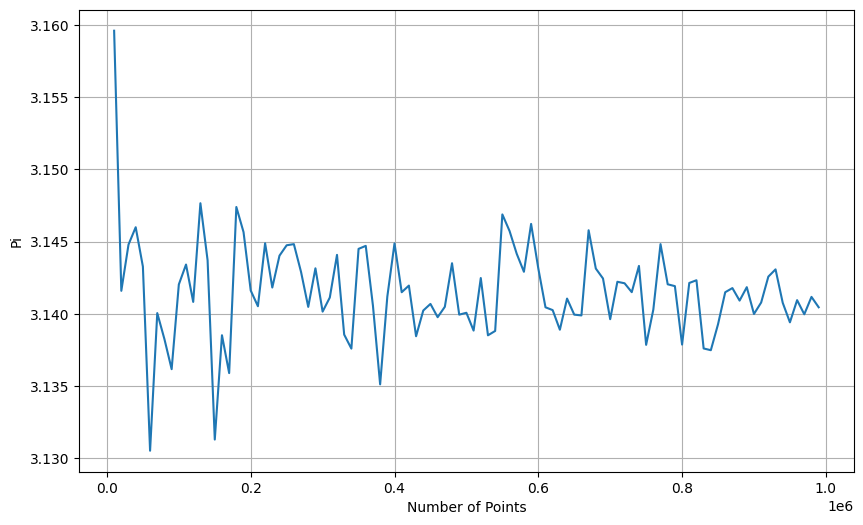

In [26]:
# Graphical representation of the convergence of pi to 3.14159
plt.figure(figsize=(10,6))
plt.plot(sample,piConverge)
plt.xlabel("Number of Points")
plt.ylabel("Pi")
plt.grid()

##### Back to our Monte Carlo Simulation

Esseentially, when pricing options with Monte Carlo we are doing the same, but fitting the simulation to the options payoff structure. <br>
<br>
The main difference is that we are not simulating points in a square, but simulating the possible paths of the underlying asset and volatility, taking in mind more dimensions. Stock price evolution over time is a stochastic process, meaning that it is a process that is not deterministic, but random, therefore we estimate it using Geometric Brownian Motion (GBM), and for volatility Liu and Pan, 2003. <br>

## Importing the libraries

In [1]:
from QuantFunctions import QuantStuff # importing custom functions from QuantFunctions.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
qs = QuantStuff() # creating an instance of the class QuantStuff

## Setting up Initial Parameters

In [3]:
paramsAsian = [100,# S_0, Stock price at time 0
                0.5, # params[1], mean reversion rate
                0.063, # params[2], long term variance
                0.05, # V_0, initial variance
                0.38, # params[4], volatility of variance
                -0.321, # params[5], correlation between stock and variance
                0.05, # params[6], risk free rate
                1/252, # delta_t, time step 1 day
                2, # n_years, number of years until maturity
                110] # params[9], strike price of option

numPrice_simulationsAsian = 5000
numGreek_simulationsAsian = 2000
seed = 1 # enable seed for reproducibility, to disable set to 0

## Stock Price and Volatility Simulation

In [4]:
S_matrix, V_matrix = qs.PriceSimulations(paramsAsian, numPrice_simulationsAsian, seed)

## Options Price Calculation

In [5]:
price = qs.OptionsPrice(paramsAsian, S_matrix)
print("Price of Asian option: $", price)

Price of Asian option: $ 4.996103875456643


## Simulated Stock Price and Variance Paths

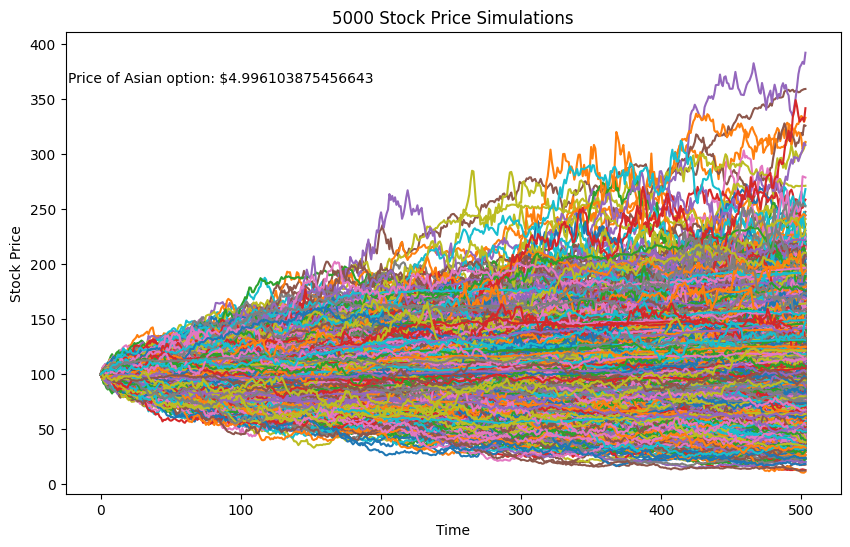

In [6]:
time = np.arange(int(paramsAsian[7]**-1*paramsAsian[8]))

# Stock Price
plt.figure(figsize=(10,6))
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"{numPrice_simulationsAsian} Stock Price Simulations" )
plt.text(0.2, 0.9, f"Price of Asian option: ${price}",ha='center', va='center',  transform=plt.gca().transAxes)

plt.plot(time, S_matrix);

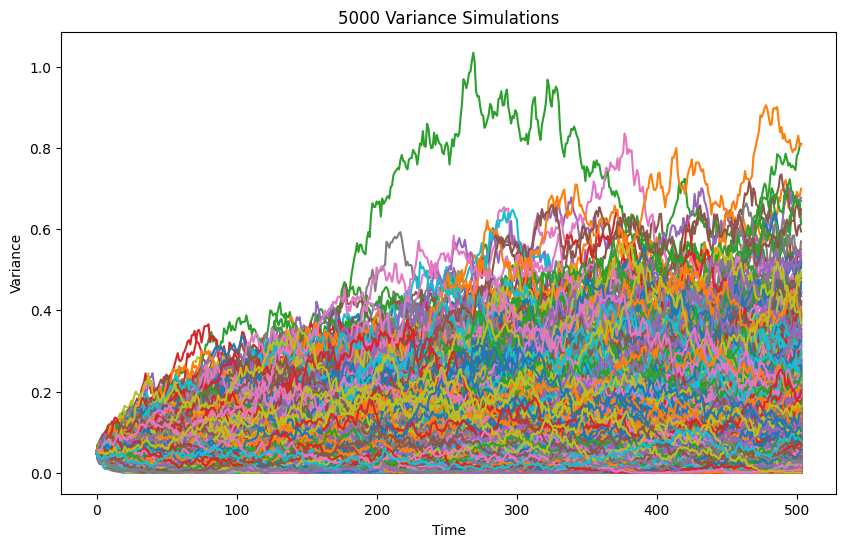

In [7]:
# Variance
plt.figure(figsize=(10,6))
plt.title(f"{numPrice_simulationsAsian} Variance Simulations")
plt.xlabel("Time")
plt.ylabel("Variance")
plt.plot(time, V_matrix);

## Options Greeks

In [8]:
# Options Delta
delta = qs.DeltaSimulations(paramsAsian, numGreek_simulationsAsian, seed)
print("Delta of Asian option: ", delta)

Delta of Asian option:  0.6969976616915319


In [9]:
# Options Vega
vega = qs.VegaSimulations(paramsAsian, numGreek_simulationsAsian, seed)
print("Delta of Asian option: ", vega)

Delta of Asian option:  81.73602759680416


## Summary Table

In [10]:
# create a new df with price and vega
df = pd.DataFrame({'PriceSimulations': [numPrice_simulationsAsian],'Price': [price], 'GreekSimulations': [numGreek_simulationsAsian], 'vega': [vega], 'delta': [delta]})
df

,PriceSimulations,Price,GreekSimulations,vega,delta
0,5000,4.996104,2000,81.736028,0.696998


In [11]:
# save df to csv
#df.to_csv('FinalDeliverable.csv', index=False)